In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

pd.set_option('display.max_columns', None)
df = pd.read_csv("madrid_sale_properties_details.csv")
df.head(2)


,url,property_native_id,price_eur,barrio,distrito,latitude,longitude,scrape_status,scraped_timestamp,description,energy_certificate_main_classification,energy_consumption_rating,energy_consumption_value,energy_emissions_rating,energy_emissions_value,Adaptado a personas con movilidad reducida,Agua,Aire acondicionado,Amueblado,Antigüedad,Armarios empotrados,Ascensor,Balcón,Baños,Calefacción,Calle alumbrada,Calle asfaltada,Carpintería exterior,Carpintería interior,Chimenea,Cocina equipada,Comedor,Conservación,Exterior,Garaje,Gas,Gastos de comunidad,Habitaciones,Interior,Jardín,Lavadero,Luz,No se aceptan mascotas,Orientación,Piscina,Planta,Portero automático,Puerta blindada,Referencia,Se aceptan mascotas,Sistema de seguridad,Soleado,Superficie construida,Superficie solar,Superficie útil,Teléfono,Terraza,Tipo de casa,Tipo suelo,Trastero,Urbanizado,Vidrios dobles,page_source
0,https://www.pisos.com/comprar/piso-recoletos28...,4.756077e+10,9500000.0,Recoletos,Salamanca,"40,4221164","-3,6831486",Success,2025-05-28T17:29:28.477101,Exclusiva Propiedad en Recoletos junto al Parq...,En trámite,NaN,NaN,NaN,NaN,NaN,NaN,Frío y calor,True,NaN,Más de 2,True,True,5.0,Central,NaN,NaN,PVC,NaN,NaN,True,True,A estrenar,True,NaN,NaN,486.75€ agua ibi 3.300€,4.0,NaN,NaN,NaN,NaN,NaN,Oeste,NaN,1ª,Portero físico,NaN,426213,NaN,NaN,NaN,499 m²,NaN,499 m²,NaN,NaN,NaN,Tarima maciza,NaN,NaN,NaN,1
1,https://www.pisos.com/comprar/piso-universidad...,5.003730e+10,840000.0,Universidad-Malasaña,Centro,"40,422312","-3,706137",Success,2025-05-28T17:29:30.304660,UNICA INMOBILIARIA ofrece este impresionante p...,En trámite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Más de 50 años,NaN,NaN,True,2.0,Individual : gas natural,NaN,NaN,PVC,NaN,NaN,True,NaN,En buen estado,True,NaN,NaN,200€ / ibi 622€,4.0,NaN,NaN,NaN,NaN,NaN,Sur y este,NaN,2ª,True,NaN,426398,NaN,NaN,NaN,109 m²,NaN,95 m²,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Para poder hacer una interpretación más acertada he eliminado los outs de precios (he ignorado los NaN y no he aplanado los datos, sólo he ignorado)

In [ ]:
#calculo de outs
Q1 = df['price_eur'].quantile(0.25)
Q3 = df['price_eur'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier'] = (df['price_eur'] < lower_bound) | (df['price_eur'] > upper_bound)


<span style="color: blue">Histograma donde los outliers están en rojo y los valores normales en azul.</span>

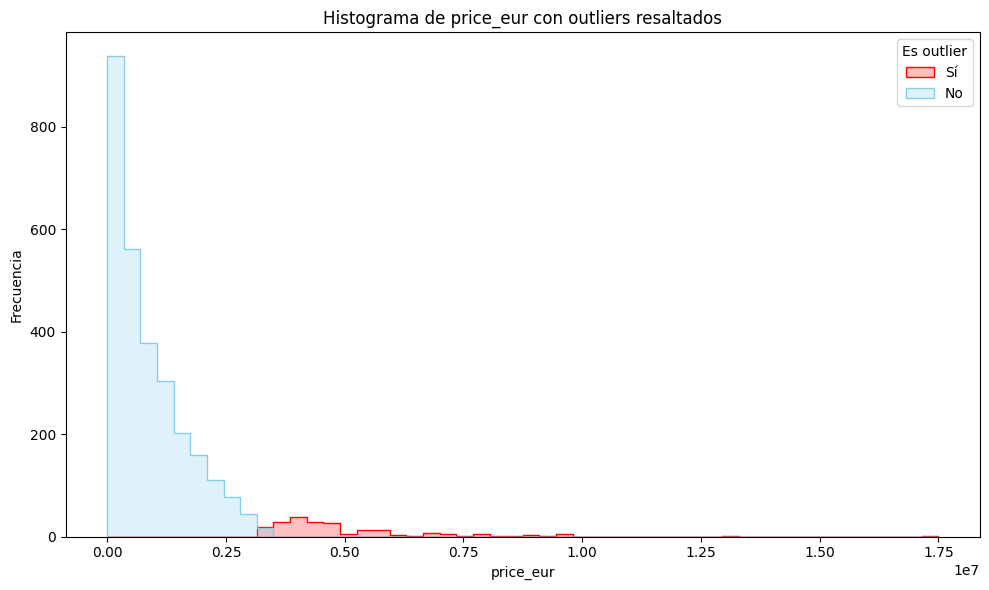

In [4]:
# Histograma donde los outliers están en rojo y los valores normales en azul
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='price_eur', hue='outlier', bins=50, palette={False: 'skyblue', True: 'red'}, element='step', kde=False)

plt.title('Histograma de price_eur con outliers resaltados')
plt.xlabel('price_eur')
plt.ylabel('Frecuencia')
plt.legend(title='Es outlier', labels=['Sí', 'No'])
plt.tight_layout()
plt.show()


<span style="color: blue">Relación entre precio y superficie</span>

In [5]:
#Limpio la columna
df["Superficie construida"] = df["Superficie construida"].str.replace(' m²', '').astype(float)

Q1 = df['Superficie construida'].quantile(0.25)
Q3 = df['Superficie construida'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier'] = (df['Superficie construida'] < lower_bound) | (df['Superficie construida'] > upper_bound)
df_sin_outliers = df[(df['Superficie construida'] >= lower_bound) & (df['Superficie construida'] <= upper_bound)]
df = df_sin_outliers.copy()


In [6]:
# Calcular el precio medio por metro cuadrado por barrio
df_filtrado = df.dropna(subset=['barrio', 'Superficie construida', 'price_eur'])
df_filtrado = df_filtrado[df_filtrado['Superficie construida'] > 0]

df_filtrado['precio_m2'] = df_filtrado['price_eur'] / df_filtrado['Superficie construida']
precio_m2_barrio = df_filtrado.groupby('barrio')['precio_m2'].mean().sort_values(ascending=False)

print(precio_m2_barrio)

barrio
El Plantío       3.425030e+06
Piovera          2.044789e+06
Valdemarín       1.409695e+06
Las Tablas       2.595210e+05
Prosperidad      1.772566e+05
                     ...     
Los Ángeles      2.614623e+03
Entrevías        2.500244e+03
San Fermín       2.363651e+03
Orcasitas        2.028731e+03
San Cristóbal    1.992221e+03
Name: precio_m2, Length: 134, dtype: float64


In [7]:
df['precio_m2'] = df['price_eur'] / df['Superficie construida']


<span style="color: blue">Grafico el precio por metro cuadrado por barrio</span>

In [ ]:
# Grafico el precio por metro cuadrado por barrio


fig = px.scatter(
    df,
    x='Superficie construida',
    y='price_eur',
    color='barrio', 
    hover_data=['price_eur', 'Superficie construida', 'barrio'], 
    title='Precio vs Superficie Construida segmentado por barrio',
    labels={'superficie_construida': 'Superficie Construida (m²)', 'price_eur': 'Precio'}
)

fig.show()


<span style="color: blue">Relación entre precio y antiguedad</span>

La antiguedad la he mapeado en una cifra media de años para ver la relacion con el precio, parace que la columna no está muy relacionada

In [38]:
df["Antigüedad"].unique()
print(df['Antigüedad'].value_counts())

Antigüedad
Más de 50 años        1221
Entre 30 y 50 años     246
Entre 20 y 30 años     110
Entre 10 y 20 años      71
Menos de 5 años         30
Entre 5 y 10 años       13
Name: count, dtype: int64


Aunque la relación entre antigüedad y precio no es demasiado fuerte sí se observa una lógica correlación negativa (a más antiguo menos precio)

In [39]:
mapa_antiguedad = {
    "Menos de 5 años": 3,
    "Entre 5 y 10 años": 7,
    "Entre 10 y 20 años": 15,
    "Entre 20 y 30 años": 25,
    "Entre 30 y 50 años": 40,
    "Más de 50 años": 60
}

df["antiguedad_valor"] = df["Antigüedad"].map(mapa_antiguedad)
print(df[["antiguedad_valor", "price_eur"]].corr())

                  antiguedad_valor  price_eur
antiguedad_valor          1.000000  -0.025176
price_eur                -0.025176   1.000000


<span style="color: blue">gráfica de relación entre precio y antiguedad</span>

En el gráfico vemos como el precio medio de pisos con más de 7 años baja de forma gradual, habiendo gran cantidad de outliers y una diferencia al alza en edificos con más de 50 años

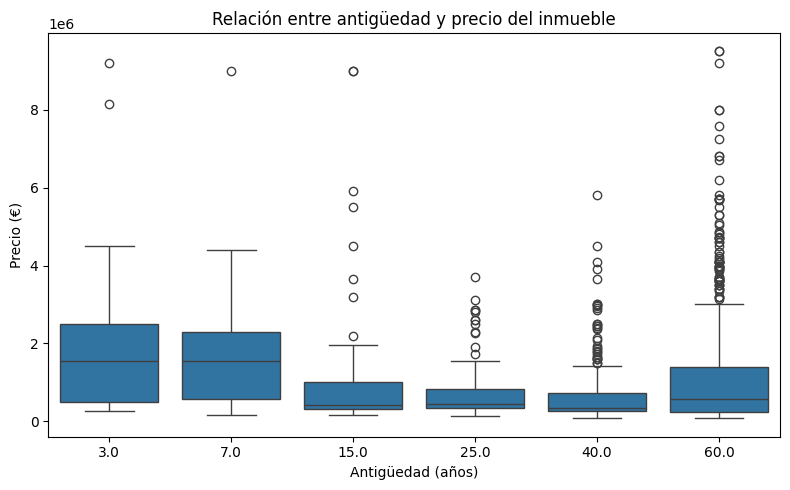

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='antiguedad_valor', y='price_eur')
plt.title('Relación entre antigüedad y precio del inmueble')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Precio (€)')
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------

La función de abajo recoge una categorización aproximada de inmuebles desde la descripción, pero no es precisa ya que la descripción puede contener varias palabras clave o ser una empresa. Por lo tanto queda como anecdótica o pendiente de revisión.

In [50]:
# Función para categorizar el tipo de inmueble
def categorizar_inmueble(description):
    if pd.isna(description):
        return 'Otro'
    description = description.lower()
    if 'piso' in description:
        return 'Piso'
    elif 'casa' in description:
        return 'Casa'
    elif 'chalet' in description:
        return 'Chalet'
    elif 'adosado' in description or 'adosada' in description:
        return 'Adosado'
    elif 'unifamiliar' in description:
        return 'Unifamiliar' 
    elif 'garaje' or 'cochera' in description:
        return 'Garaje'
    elif 'trastero' in description: 
        return 'Trastero'
    elif 'local' in description:
        return 'Local'
    elif 'oficina' or 'negocio' in description:
        return 'Negocio'
    else:
        return 'Otro'


df['tipo_inmueble'] = df['description'].apply(categorizar_inmueble)

print(df['tipo_inmueble'].value_counts())

tipo_inmueble
Piso           1800
Otro            422
Casa            360
Garaje          189
Local            85
Trastero         70
Chalet           56
Oficina          32
Unifamiliar       3
Adosado           2
Cochera           1
Name: count, dtype: int64


<span style="color: blue">Precio medio por barrio</span>

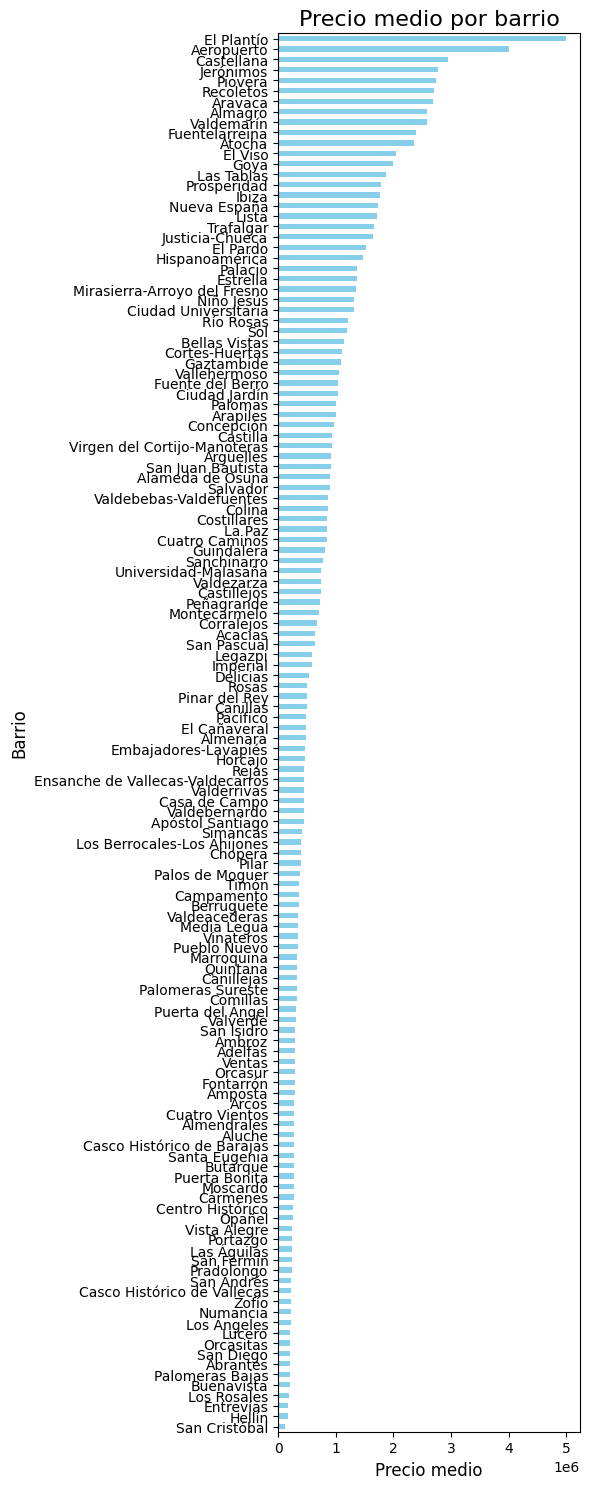

In [ ]:
# gráfico del precio medio por barrio (vertical)

precio_medio_por_barrio = df.groupby('barrio')['price_eur'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 15))
precio_medio_por_barrio.plot(kind='barh', color='skyblue')
plt.title('Precio medio por barrio', fontsize=16)
plt.xlabel('Precio medio', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.tight_layout()
plt.show()




<span style="color: blue">relaión entre habitaciones y precio</span>

En este gráfico vemos que el precio crece al crecer el número de habitaciones (bastante lógico, ya que más habitaciones suponen más metros cuadrados...habitualmente)

PD. Dmytri comentó que él hizo un modelo y que su matriz no daba importancia a esta columna tomaba como referencia el número de baños y los metros

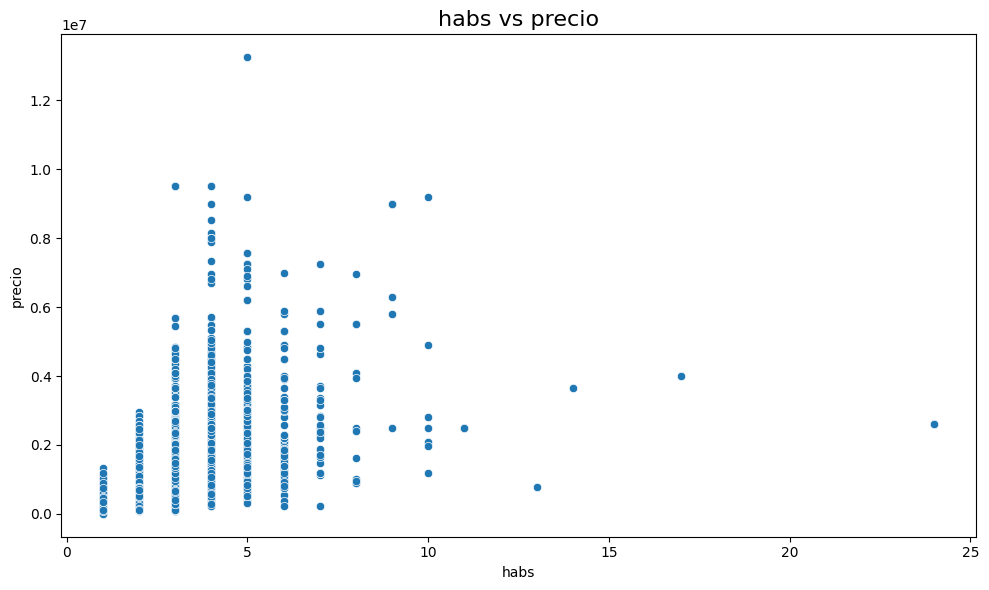

In [47]:
#relaión entre habitaciones y precio

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Habitaciones', y='price_eur')
plt.title('habs vs precio', fontsize=16)
plt.xlabel('habs')
plt.ylabel('precio')
plt.tight_layout()
plt.show()

<span style="color: blue">relación de inmuebles adaptados por barrio</span>

He graficado la relación de inmuebles adaptados por barrio. En primer lugar está Sol y en segundo (omito el "otros") está Cortes. 
No lo he referenciado a precio porque al no coincidir con la relación de precio medio por barrio no me parece significativa para la predicción.
Asumiría que Sol y Cortes son barrios envejecidos, pero esto es más una apreciación anecdótica que útil.

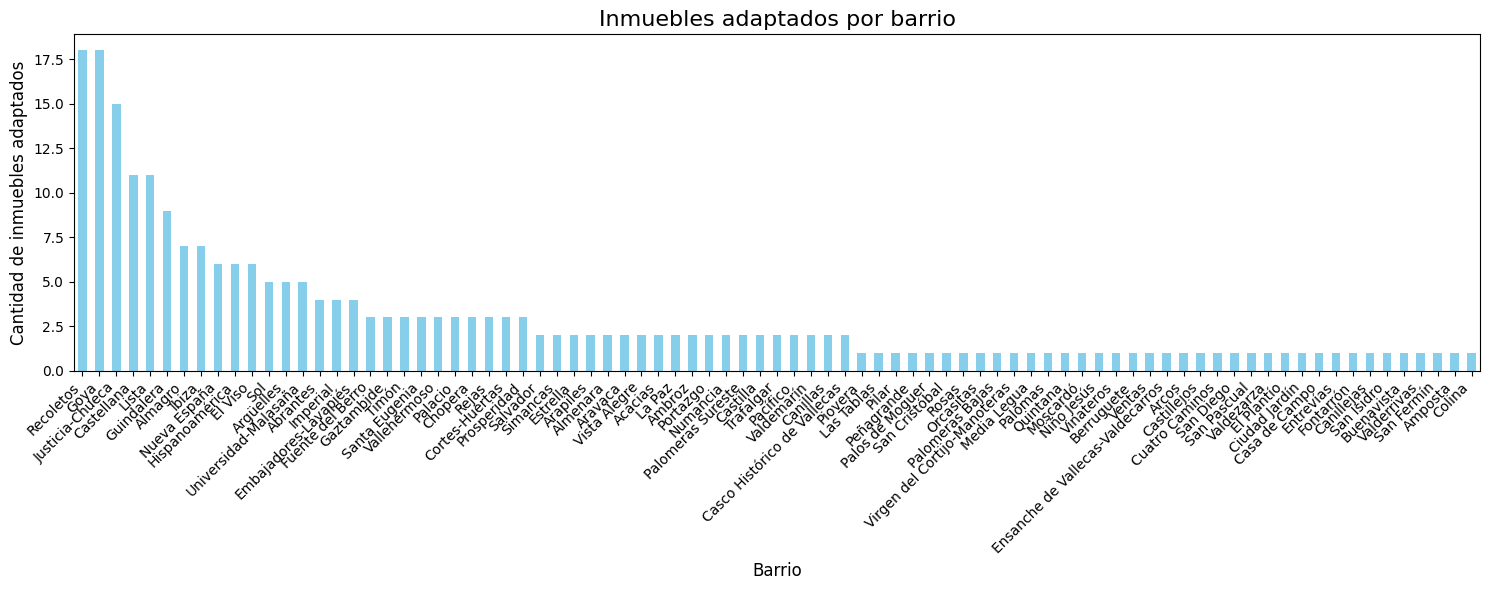

In [ ]:
# Relación entre "Adaptado a personas con movilidad reducida" y "barrio"


adaptado_barrio = df.groupby('barrio')['Adaptado a personas con movilidad reducida'].apply(lambda x: x.notna().sum()).sort_values(ascending=False)

adaptado_barrio = adaptado_barrio[adaptado_barrio > 0]

plt.figure(figsize=(15, 6))
adaptado_barrio.plot(kind='bar', color='skyblue')
plt.title('Inmuebles adaptados por barrio', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Cantidad de inmuebles adaptados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Sí hay una relación directa con el precio y si el edificio está adaptado. aunque en esta diferención no tenemos en cuenta el barrio

In [ ]:
#DIferencia de precio entre pisos adaptados y no adaptados

df["Adaptado a personas con movilidad reducida"] = df["Adaptado a personas con movilidad reducida"].apply(
    lambda x: 1 if str(x).strip().lower() in ["sí", "si", "true", "1"] else 0
)

adaptado = df[df["Adaptado a personas con movilidad reducida"] == 1]["price_eur"]
no_adaptado = df[df["Adaptado a personas con movilidad reducida"] == 0]["price_eur"]

# Promedios
print("Precio medio (adaptado):    ", round(adaptado.mean(), 2))
print("Precio medio (no adaptado): ", round(no_adaptado.mean(), 2))

# diferencia de medias
print(f"los inmuebles adaptados cuestan una media de : { round(adaptado.mean())-round(no_adaptado.mean())} más que los no adaptados")


Precio medio (adaptado):     1186391.01
Precio medio (no adaptado):  855623.93
los inmuebles adaptados cuestan una media de : 330767 más que los no adaptados


En aire acondicionado, en amueblado, Balcón, Garaje, piscina, luz y puerta blindada no he realizado ninguna acción, sería interesante, una vez limpio ver los precios para alquiler. 

In [ ]:
df["Aire acondicionado"].unique()

array([nan, 'True', 'Frío y calor', 'Frío', 'Individual',
       'Splits y unidades', 'A/a f/c', 'Comunitario', 'Aerotermia',
       'Frío-calor', 'Con bomba de calor', 'Centralizado',
       'A/a por conductos con sistema airzone', 'A/a f/c centralizado',
       'En toda la casa', 'De ventana', 'Por conductos independientes',
       'Por conductos'], dtype=object)

In [ ]:
df["Amueblado"].unique()

array(['True', nan, 'Si, con muebles de diseño',
       'Solo cocina y el mueble del salón',
       'Amueblado y equipado de lujo',
       'Amueblado para alquilar por habitaciones', 'Opcional', 'Vacío',
       'No', 'Reformado y amueblado de lujo', 'Si con muebles de diseño',
       'Solo cocina y baños', 'Se vende amueblado', 'Cocina',
       'Cocina amueblada', 'Todo el piso esta amueblado.',
       'Semi amueblado', 'Completamente amueblado', 'Solo la cocina',
       'También vacío', 'Con muy buenas calidades', 'Completo',
       'O sin mueble'], dtype=object)

In [ ]:
df["Balcón"].unique()

array([True, nan], dtype=object)

In [ ]:
 df["Garaje"].unique()

array([nan, '1', 'True', '2', 'Más de 2'], dtype=object)

In [ ]:
df["Piscina"].unique()

array([nan, 'Comunitaria', 'Propia', 'True', 'Gym y spa.', 'Privada'],
      dtype=object)

<span style="color: blue"> relaicón entre el precio y si hay o no ascensor.</span>


Conclusión, los pisos con ascensor tienen un precio medio más alto. La diferencia de precio no se explica sólo por la existencia de ascensor. Esto puede ser por motivos distintos a la existencia del ascensor, pero hay una aparente correlación y debería tenerse en cuenta.

In [45]:
#DIferencia de precio entre pisos con y sin ascensor
df["Ascensor"] = df["Ascensor"].apply(lambda x: 1 if pd.notna(x) else 0)

Ascensor = df[df["Ascensor"] == 1]["price_eur"]
no_Ascensor = df[df["Ascensor"] == 0]["price_eur"]

# Promedios
print("Precio medio (Ascensor):    ", round(Ascensor.mean(), 2))
print("Precio medio (no Ascensor): ", round(no_Ascensor.mean(), 2))

# Test de diferencia de medias
print(f"los inmuebles con ascensor cuestan una media de : { round(Ascensor.mean())-round(no_Ascensor.mean())} más que los no ascensor")

Precio medio (Ascensor):     1325752.21
Precio medio (no Ascensor):  988260.29
los inmuebles con ascensor cuestan una media de : 337492 más que los no ascensor


<span style="color: blue"> relaicón entre el precio y número de baños .</span>

Como he comentado antes, Dmytri comentó que su modelo valoraba el número de baños más que el de habitaciones.
He rescatado una función para rellenar los NaN de baños que tenía en un ejercicio anterior, asume mínimo uno por inmueble e imputa 1 baño cada 70 metros.
En el gráfico vemos que el precio de la propiedad crece en realción directa a número de baños (es lógico ya que también está directamente relacionado con los metros cuadrados del inmueble).


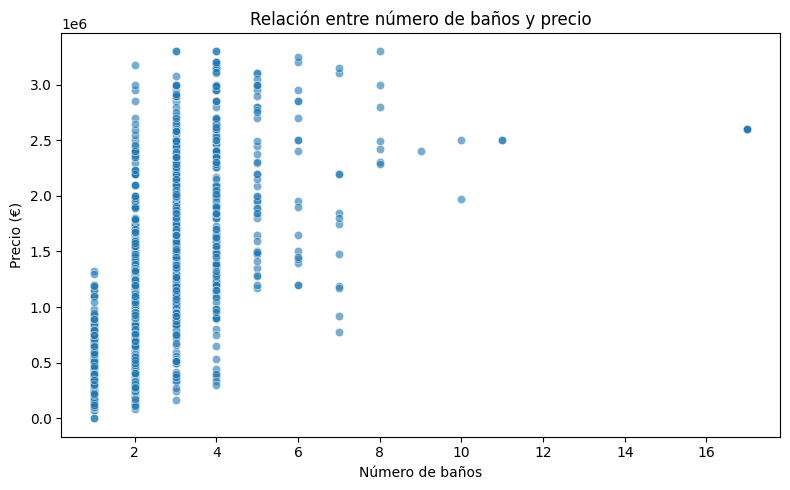

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_filtrado, x="Baños", y="price_eur", alpha=0.6)

plt.title("Relación entre número de baños y precio")
plt.xlabel("Número de baños")
plt.ylabel("Precio (€)")
plt.tight_layout()
plt.show()


<span style="color: blue"> relaicón entre el precio, número de baños y número de habitaciones.</span>

Se observa una línea ascendente, aunque veos que los precios se dispersan a partír de los 6 baños y 7 habitaciones, lo que nos da una pista sobre la posibilidad de otros factores determinantes para calcular el precio. Pero igualmente indica la importancia y relación de estas dos variables.

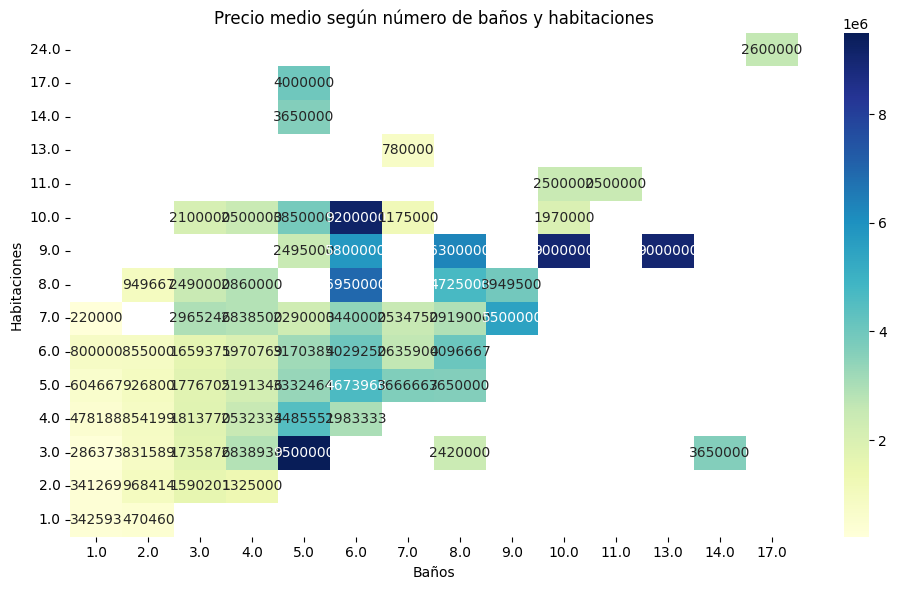

In [44]:
# Crear tabla dinámica
pivot_table = df.pivot_table(
    index='Habitaciones',
    columns='Baños',
    values='price_eur',
    aggfunc='mean'
)

pivot_table = pivot_table.sort_index(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Precio medio según número de baños y habitaciones")
plt.xlabel("Baños")
plt.ylabel("Habitaciones")
plt.tight_layout()
plt.show()

<span style="color: blue"> relaicón entre el precio y el estado de conservación.</span>

En conservación los resultados son los esperados, los reformados y los a estrenar son más caros que los ue están en buen estado y a reformar

In [ ]:
 df["Conservación"].unique()

array(['En buen estado', nan, 'Reformado', 'A reformar', 'A estrenar'],
      dtype=object)

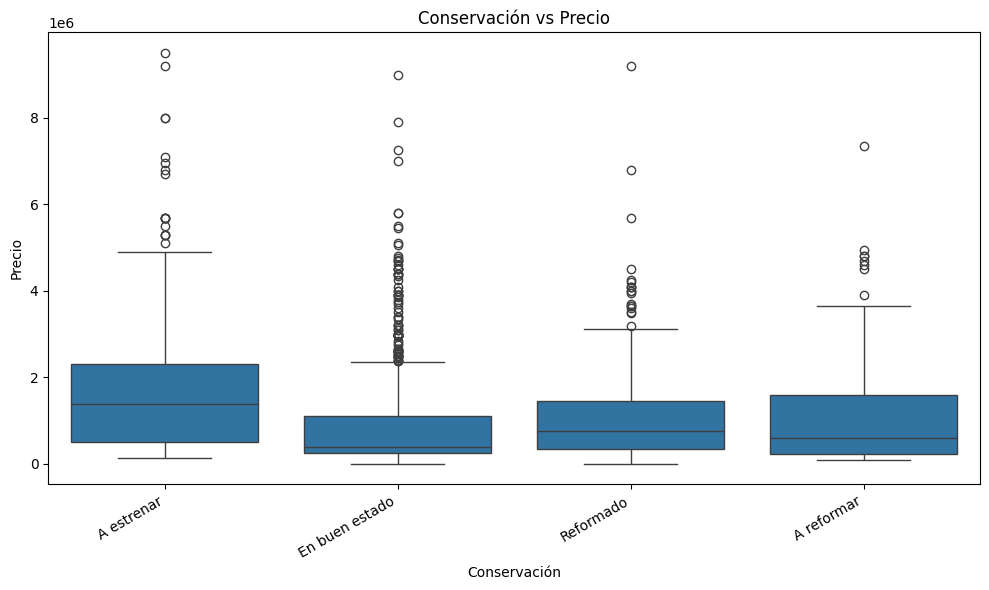

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Conservación', y='price_eur')
plt.title('Conservación vs Precio')
plt.xlabel('Conservación')
plt.ylabel('Precio')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

<span style="color: blue"> relaicón entre el precio y planta.</span>

Para la planta he asignado el semisótano y entresuelo un -1 y un 0 a bajo y principal y he graficado en relación al preico.
La fluctuación de Boxplots en las plantas me hace pensar que no está muy relacionado con el precio en la compra-venta de pisos, esta relación será incluso menos acentuada en el alquiler.

In [ ]:
df["Planta"].unique()

array(['2ª', nan, '3ª', '1ª', '5ª', '4ª', '6ª', 'Bajo', '7ª', '8ª', '10ª',
       'Semisótano', '9ª', '12ª', 'Entresuelo', 'Principal', '11ª',
       'Más de 20', '14ª', '16ª', '17ª'], dtype=object)

In [49]:
def normalizar_planta(Planta):
    if pd.isna(Planta):
        return Planta
    planta = str(Planta).strip().lower()
    if "semisótano" in planta or "entresuelo" in planta:
        return -1
    if "principal" in planta or "bajo" in planta:
        return 0
    if "más de 20" in planta:
        return 20
    planta = planta.replace("ª", "").replace("º", "")
    try:
        return int(planta)
    except ValueError:
        return Planta  

df["Planta_normalizada"] = df["Planta"].apply(normalizar_planta)
print(df["Planta_normalizada"].unique())


[ 1.  2.  3. nan  5.  6.  4.  0.  7.  8. 10. -1.  9. 12. 11. 20. 14. 16.
 17.]


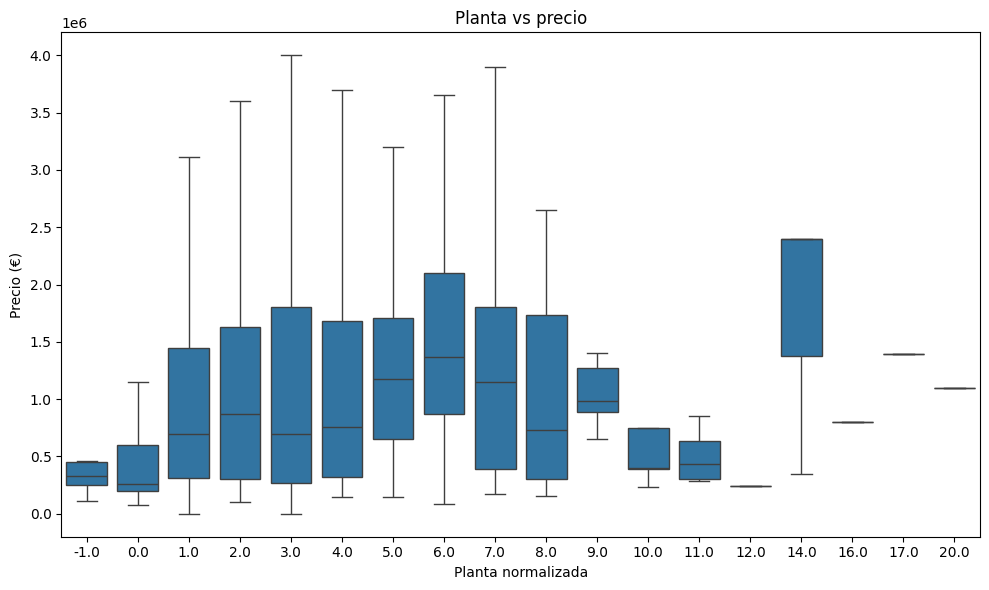

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Planta_normalizada', y='price_eur', showfliers=False)
plt.title('Planta vs precio')
plt.xlabel('Planta normalizada')
plt.ylabel('Precio (€)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El resto de columnas las considero prescindibles, bien sea por la dificultad de limpieza o por la poca relevancia que tienen para el análisis.